In [4]:
library(lubridate)
library(reshape2)
library(dplyr)
library(scales)
library(stringr)
library(MASS)
library(ggplot2)
library(data.table)
library(ggpubr)


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date


Warning message:
"package 'reshape2' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:lubridate':

    intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'scales' was built under R version 3.6.3"
Warning message:
"package 'MASS' was built under R version 3.6.3"

Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'data.table' was built under R version 3.6.3"

Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    betwee

In [58]:
cost = fread("../../data/tidy/energy-cost.csv")

In [22]:
png("../../figures/figures for report/energy cost-2019.png",height= 4000,width=6000, res=360)
ggplot(cost,aes(x = factor(V1,levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec")),y = cost/1000000,group =1)) + 
    geom_line(color = "blue", size = 3) + 
    labs(x = "Month", y = "Monthly energy cost (million dollars)") +
   theme_light() +
    theme(
          axis.title.x = element_text(size = 30),
          axis.title.y = element_text(size = 30),
          axis.text.x = element_text(size = 25),
          axis.text.y = element_text(size = 25))
dev.off()

ERROR: Error in ggplot(cost, aes(x = factor(V1, levels = c("Jan", "Feb", "Mar", : object 'cost' not found


In [5]:
YEARLIST =c("19","20")
MONTHLIST = c("01", "02", "03", "04", "05", "06", "07", "08", "09", "10","11","12")
COMPUTATION_FILEPATH = "F:/data/tidy/trajectory-aggregation/"
# Data input
aggregation_data_input = function(YEARLIST,MONTHLIST){
    df = data.table()
    for (y in YEARLIST) {
         for (m in MONTHLIST) {
             assign("d",fread(paste0(COMPUTATION_FILEPATH, paste(paste("trajectory", "aggregation" , y , m , sep = "-", collapse = ""), ".csv", sep=""))))
             df = rbind(df,d)
             }
        }
    return(df)
}
agg_data = aggregation_data_input(YEARLIST,MONTHLIST)

In [6]:
time_series = agg_data

In [7]:
time_series[time_hr > 500,"time_hr"] = NA
time_series$Energy_miles = time_series$energy_MWh/time_series$distance_mile
time_series$Energy_hours = time_series$energy_MWh/time_series$time_hr
colnames(time_series)[10] = "(c) Hourly operating distance (vehicle-miles)"
colnames(time_series)[11] = "(d) Hourly operating time (vehicle-hours)"
colnames(time_series)[65] = "(a) Hourly energy consumption (MWh)"
colnames(time_series)[62] = "(b) Hourly system ridership"
colnames(time_series)[64] = "(f) Average daily temperature (F)"
colnames(time_series)[6] = "red"
colnames(time_series)[7] = "blue"
colnames(time_series)[8] = "orange"
colnames(time_series)[9] = "green"
time_series$num_trains = time_series$red + time_series$orange + time_series$blue + time_series$green
# time_series[num_trains > 250,"num_trains"] = NA
colnames(time_series)[68] = "(e) Hourly operating trains"
time_series$Date = with(time_series, ISOdatetime(year,  month, day, hour, 0, 0))
time_series_melt = melt(time_series,id.vars = c("Date"), measure.vars = c("(a) Hourly energy consumption (MWh)",
                                                                         "(b) Hourly system ridership",
                                                                         "(c) Hourly operating distance (vehicle-miles)",
                                                                         "(d) Hourly operating time (vehicle-hours)",
                                                                         "(e) Hourly operating trains",
                                                                         "(f) Average daily temperature (F)"))

Warning message in melt.data.table(time_series, id.vars = c("Date"), measure.vars = c("(a) Hourly energy consumption (MWh)", :
"'measure.vars' [(a) Hourly energy consumption (MWh), (b) Hourly system ridership, (c) Hourly operating distance (vehicle-miles), (d) Hourly operating time (vehicle-hours), ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion."


In [67]:
png("../../figures/figures for report/ridership.png",height= 3000,width=9000, res=360)
ggplot(time_series,aes(x = Date,y = ridership)) + 
    geom_point(color = "#619CFF",size = 3) + 
    labs(x = "Date", y = "Ridership") +
   theme_light() +
    theme(
          axis.title.x = element_text(size = 35),
          axis.title.y = element_text(size = 35),
          axis.text.x = element_text(size = 30),
          axis.text.y = element_text(size = 30))
dev.off()

png 
  2

In [29]:
png("../../figures/figures for report/energy_consumption.png",height= 3000,width=8000, res=360)
ggplot(time_series,aes(x = Date,y = Energy_MWh)) + 
   ylim(20,70)+
    geom_point(color = "navyblue",size = 3) + 
    labs(x = "Date", y = "Energy consumption (MWh)") +
   theme_light() +
    theme(strip.text = element_text(size = rel(9)),
          axis.title.x = element_text(size = 30),
          axis.title.y = element_text(size = 30),
          axis.text.x = element_text(size = 25),
          axis.text.y = element_text(size = 25))
dev.off()

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'Energy_MWh' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. pas

png 
  2

In [15]:
png("../../figures/Time_series_paper.png",height= 8000,width=7000, res=360)
ggplot(time_series_melt,aes(x = Date,y = value)) + 
    geom_point(colour="darkorange",size = 0.5) + 
    facet_wrap(~variable,ncol = 1 , scales = "free_y") +
    labs(x = "Date") +
    theme_bw() +
    theme(strip.text = element_text(size = rel(3)),
          axis.title.x = element_text(size = 30),
          axis.title.y = element_blank(),
          axis.text.x = element_text(size = 25),
          axis.text.y = element_text(size = 25),
          panel.spacing = unit(2, "lines"),
         panel.grid.major = element_line(colour = "grey70", size = 0.3)) +
          #plot.background = element_rect(colour = "grey50", size = 2),) +
       scale_x_datetime(date_breaks ="2 month",date_labels = ("%m/%y"))      
dev.off()

Warning message:
"Removed 1676 rows containing missing values (geom_point)."


png 
  2

In [134]:
sum(agg_data$green,na.rm =TRUE)

[1] 1044782

In [159]:
d1 = df_melt_2[distance == "distance_mile" & line == "red",]

In [160]:
sum(d1$value,na.rm =TRUE)

[1] 20327505

In [150]:
aggregate(df_melt_2$value, by = list(df_melt_2$line,df_melt_2$distance),sum)

Group.1,Group.2,x
<fct>,<fct>,<dbl>
red,distance_mile,20327505
blue,distance_mile,20327505
orange,distance_mile,20327505
green,distance_mile,20327505
red,time_hr,2869494
blue,time_hr,2869494
orange,time_hr,2869494
green,time_hr,2869494


In [142]:
df_melt_2 = melt(df_melt,id.vars = c("variable","value"),measure.vars = c("red","blue","orange","green"))

Duplicate column names found in molten data.table. Setting unique names using 'make.names'


In [162]:
df_melt = melt(agg_data,id.vars = c("red","blue","orange","green"),measure.vars = c("distance_mile"))

In [161]:
agg_data[,sum(distance_mile,na.rm =TRUE), by =.(red,green,orange,blue)]

red,green,orange,blue,V1
<int>,<int>,<int>,<int>,<dbl>
29,52,16,10,909.99484
29,60,17,11,857.54509
26,60,15,13,838.85886
28,63,16,12,3376.27022
28,65,16,12,6782.92590
27,65,17,12,2432.63552
28,66,21,12,980.38101
26,64,17,12,907.74143
30,66,16,12,3566.35514


In [84]:
write.csv(m,"../../data/raw/monthly-distance-hour.csv")

In [66]:
fix(m)

In [9]:
# change the type of speed and distance column
# Metrics_df$dist = as.numeric(as.character(Metrics_df$dist))
# Metrics_df$kph = as.numeric(as.character(Metrics_df$kph))
# add the mph column
interval_df$mph = 0.621371*interval_df$kph
interval_df$mile = interval_df$dist*0.000621371
interval_df$time_hr = interval_df$timeinterval/3600.0 

In [29]:
# Combine two tables
day_df = interval_df[, lapply( .SD, sum , na.rm=TRUE), by = c('Month','Day'), .SDcols = c('mile', 'mph', 'time_hr')]
dc1 = subset(dc,dc$Year==2019)

In [31]:
dc1$Day = dc1$`Day of Month`
dc1$energy_kwh = dc1$`Total Daily Load`

In [60]:
merged_df = cost
merged_df$cost_per_mile = merged_df$cost/merged_df$mile
merged_df$cost_per_hour = merged_df$cost/merged_df$hour
merged_df$energy_per_mile = merged_df$energy/merged_df$mile
merged_df$energy_per_hour = merged_df$energy/merged_df$hour
merged_df$GHG_mile = merged_df$energy_per_mile*945940*0.0005
merged_df$GHG_hour = merged_df$energy_per_hour*945940*0.0005

In [61]:
mean(merged_df$energy_per_hour,na.rm =TRUE)
mean(merged_df$energy_per_mile,na.rm =TRUE)
mean(merged_df$GHG_mile,na.rm =TRUE)
mean(merged_df$GHG_hour,na.rm =TRUE)

[1] 0.2734033

[1] 0.03961713

[1] 18.73771

[1] 129.3116

In [65]:
ci(merged_df$energy_per_hour,95)
ci(merged_df$energy_per_mile,95)

[1] 0.975
[1] 0.2734033


[1] 0.2476119 0.2991947

[1] 0.975
[1] 0.03961713


[1] 0.03600253 0.04323173

In [94]:
cost_metrics

,Month,cost,energy,hour,mile,cost_per_mile,cost_per_hour
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Jan,1481553,40865.46,118065.22,806794.8,1.836344,12.548595
2,Feb,1535736,35979.98,101571.67,701816.7,2.188229,15.119724
3,Mar,1560537,37819.25,122494.99,854781.3,1.825657,12.739602
4,Apr,1617236,31050.27,117625.81,845034.4,1.913811,13.748989
5,May,1568248,32016.24,125719.51,925865.5,1.693819,12.474183
6,Jun,1405221,30598.05,127849.54,872659.9,1.610274,10.991213
7,Jul,1182068,33029.13,136814.15,885412.5,1.335048,8.639955
8,Aug,1166982,33463.24,135450.38,909227.7,1.283487,8.615568
9,Sep,1198188,31404.02,137820.34,914426.7,1.310316,8.693837


In [87]:
cost_metrics = read.csv(file = "D:/Github/treem/data/tidy/energy-cost-final.csv")

In [93]:
cost_metrics$cost_per_mile = cost_metrics$cost/cost_metrics$mile
cost_metrics$cost_per_hour = cost_metrics$cost/cost_metrics$hour

In [95]:
mean(cost_metrics$cost_per_mile)
mean(cost_metrics$cost_per_hour)

[1] 1.499601

[1] 10.70803

In [98]:
 ci(cost_metrics$cost_per_hour, 95)

[1] 0.975
[1] 10.70803


[1]  9.80681 11.60926

In [54]:
merged_df = time_series[!(distance_mile == 0),]

In [22]:
merged_df = merged_df[!(merged_df$energy_MWh == 0),]

In [23]:
ci <- function (var, level) {
    prob = .01*(level + (100 - level)/2)
    print(prob)
    z = qnorm(prob)
    mu = mean(var,na.rm =TRUE)
    print(mu)
    sigma = sd(var,na.rm =TRUE)
    n = length(var)
    ci_upper = mu + z*sigma/sqrt(n)
    ci_lower = mu - z*sigma/sqrt(n)
    return(c(ci_lower, ci_upper))
}

In [25]:
cost_CI = ci(merged_df$Energy_hours, 95)

[1] 0.975
[1] 0.8596939


In [60]:
mean(merged_df$GHG_mile)

[1] 1001.801

In [59]:
cost_CI

[1]  793.847 1209.756

In [37]:
day_df_mile_ci = ci(day_df_mile$Cost_per_mile, 95)

[1] 0.975


In [24]:
# Add the confidence interval 
energy_per_mile_ci =  ci(merged_df$energy_per_mile, 95)
energy_per_hour_ci =  ci(merged_df$energy_per_hour, 95)

[1] 0.975
[1] 0.975


In [68]:
Planning_metrics_plot = read.csv("../../data/tidy/planning_metrics.csv")

In [70]:
fix(Planning_metrics_plot)

In [71]:
Planning_metrics_plot

,Planning.metrics,Mean,Lower.Confidence.Bound,Upper.Confidence.Bound
,<fct>,<dbl>,<dbl>,<dbl>
1,Energy/veh-mile (MWh/mile),0.04,0.036,0.043
2,Energy/veh-hour (MWh/hour),0.27,0.250,0.300
3,Cost per mile ($/mile),1.56,1.380,1.750
4,Cost per hour($/hour),10.82,9.460,12.180
5,Average GHG emissions per vehicle-mile (tCO2e/mi),18.73,17.030,20.450
6,Average GHG emissions per vehicle-hour (tCO2e/hr),129.31,117.110,141.510


In [72]:
Metrics_cost = Planning_metrics_plot[3:4,]
Metrics_energy = Planning_metrics_plot[1:2,]
Metrics_GHG = Planning_metrics_plot[5:6,]

In [98]:
fix(Metrics_GHG)

Warning message in edit.data.frame(get(subx, envir = parent), title = subx, ...):
"added factor levels in 'Planning.metrics'"


In [197]:
Metrics_GHG

,Planning.metrics,Mean,Lower.Confidence.Bound,Upper.Confidence.Bound
,<fct>,<dbl>,<dbl>,<dbl>
5,tCO2e/mile,1001.8,793.8,1029.8
6,tCO2e/hour,436.7,405.5,465.8


In [99]:
# #Plot the metrics
# png("../../figures/Planning metrics cost.png",height= 1000,width=1000, res=120)
p1 = ggplot(Metrics_cost) +
    geom_bar(aes(x = Planning.metrics, y= Mean), stat="identity", fill="skyblue", alpha=0.5,width=0.4) +
   geom_errorbar(aes(x=Planning.metrics, ymin= Lower.Confidence.Bound, ymax = Upper.Confidence.Bound), width=0.2, colour="orange", alpha=0.9, size=1.5) +
     theme_bw() + 
   theme(axis.text=element_text(size=75),axis.title.x = element_blank(), axis.title.y = element_blank())
# dev.off()

In [100]:
# png("../../figures/Planning metrics energy.png",height= 1000,width=1000, res=120)
p2 = ggplot(Metrics_energy) +
    geom_bar(aes(x = Planning.metrics, y= Mean), stat="identity", fill="skyblue", alpha=0.5,width=0.4) +
   geom_errorbar(aes(x=Planning.metrics, ymin= Lower.Confidence.Bound, ymax = Upper.Confidence.Bound), width=0.2, colour="orange", alpha=0.9, size=1.5) +
   theme_bw() + 
   theme(axis.text=element_text(size=75),axis.title.x = element_blank(), axis.title.y = element_blank())
# dev.off()

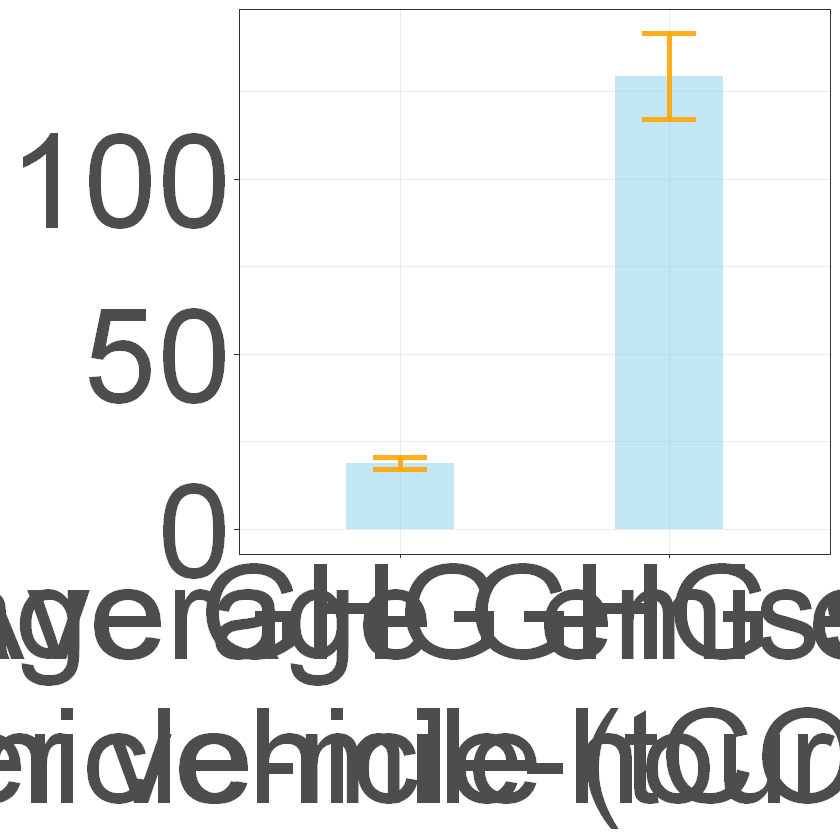

In [81]:
p3

In [101]:
# png("../../figures/Planning metrics GHG.png",height= 1000,width=2000, res=120)
p3 = ggplot(Metrics_GHG) +
   geom_bar(aes(x = Planning.metrics, y= Mean), stat="identity", fill="skyblue", alpha=0.5,width=0.4) +
   geom_errorbar(aes(x=Planning.metrics, ymin= Lower.Confidence.Bound, ymax = Upper.Confidence.Bound), width=0.2, colour="orange", alpha=0.9, size=1.5) +
 theme_bw() + 
   theme(axis.text=element_text(size=75),axis.title.x = element_blank(), axis.title.y = element_blank())
# dev.off()

In [77]:
ggarrange(p1,p2,p3,nrow = 3, ncol = 1) %>% 
     ggexport(filename = "../../figures/PM.png",width = 1500, height = 2000)

file saved to ../../figures/PM.png



In [102]:
figure = ggarrange(p1,p2,p3,nrow = 1, ncol = 3)
annotate_figure(figure,left = text_grob("Mean", color = "black", rot = 90, size = 90)) %>% 
     ggexport(filename = "../../figures/PM.png",width = 5000, height = 2500)

file saved to ../../figures/PM.png

